In [1]:
#import os
from typing import List, DefaultDict, Dict
from collections import defaultdict
import pandas as pd
import numpy as np
from  scipy.signal import correlate2d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# import matplotlib
from matplotlib import pyplot as plt
from clearn.experiments.experiment import Experiment, load_trained_model, get_model, get_train_val_iterator, MODEL_TYPE_VAE_SEMI_SUPERVISED_MNIST
from clearn.dao.dao_factory import get_dao

import tensorflow as tf
from clearn.analysis.cluster_utils import display_images
from clearn.utils.data_loader import TrainValDataIterator, DataIterator
from clearn.utils.data_loader import load_images
from clearn.config.common_path import get_encoded_csv_file
from clearn.models.classify.classifier import ClassifierModel
from clearn.config import ExperimentConfig
from matplotlib import pyplot  as  plt
from scipy.special import softmax

%matplotlib inline



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
root_path = "/Users/sunilv/concept_learning_exp/"
num_units=[64, 128, 32]
create_split = False
num_cluster_config=ExperimentConfig.NUM_CLUSTERS_CONFIG_ELBOW


In [3]:
exp_config = ExperimentConfig(root_path=root_path,
                            num_decoder_layer=4,
                            z_dim=10,
                            num_units=num_units,
                            num_cluster_config=num_cluster_config,
                            confidence_decay_factor=5,
                            beta=5,
                            supervise_weight=150,
                            dataset_name="mnist",
                            split_name="Split_1",
                            model_name="VAE",
                            batch_size=64,
                            eval_interval_in_epochs=1,
                            name="concept_learning_dictionaries",
                            num_val_samples=128,
                            total_training_samples=60000,
                            manual_labels_config=ExperimentConfig.USE_CLUSTER_CENTER,
                            reconstruction_weight=1,
                            activation_hidden_layer="RELU",
                            activation_output_layer="SIGMOID")
exp_config.check_and_create_directories(0)


True

In [4]:
dao = get_dao(exp_config.dataset_name, exp_config.split_name, exp_config.num_val_samples)
train_val_data_iterator = get_train_val_iterator(create_split=create_split,
                                                 dao= dao,
                                                 exp_config= exp_config,
                                                 num_epochs_completed=0,
                                                 split_name=exp_config.split_name)

train_images, train_labels, _ = load_images(exp_config,
                                          train_val_data_iterator,
                                          "train"
                                          )
train_labels= np.argwhere(train_labels == 1)[:,1]

Warning /Users/sunilv/concept_learning_exp/concept_learning_dictionaries/Exp_32_128_64_10_ELBOW_0/analysis/manual_annotation.csv path does not exist. Creating random prior with uniform distribution
Total Manual annotation confidence 0.0


In [5]:
train_images.shape
concepts:Dict[int, Dict[str, np.ndarray]] = dict()
height, width = train_images.shape[1], train_images.shape[2]

In [6]:
def get_segment(location_key, v_extend, h_extend, concepts=None):
    if concepts is None:
        concepts:Dict[int, Dict[str, np.ndarray]] = dict()
    if len(v_extend) == 0:
        v_extend =[0, height]
    if len(h_extend) == 0:
        h_extend =[0, width]
    for im_no in range(100):
        c = np.zeros((28, 28))
        c[v_extend[0]:v_extend[1], h_extend[0]:h_extend[1]] = np.squeeze(train_images[im_no,                                                                          v_extend[0]:v_extend[1],
                                                                        h_extend[0]:h_extend[1]])
        if train_labels[im_no] in concepts:
            if location_key in concepts[train_labels[im_no]]:
                concepts[train_labels[im_no]][location_key].append(c)
            else:
                concepts[train_labels[im_no]][location_key] = [c]
        else:
            concepts[train_labels[im_no]] = {location_key:[c]}

Number of images 9


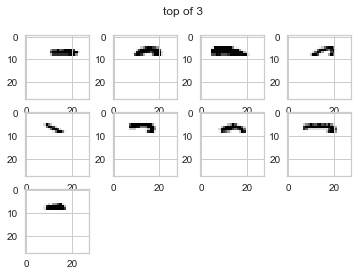

In [7]:
location_key = "top"
get_segment(location_key, [5, 9], [], concepts)
digit = 3
display_images(np.asarray(concepts[digit][location_key]),
               image_filename=None,
               title=f"{location_key} of {digit}")

In [8]:
location_key = "right"
v_extend=[14,height]
h_extend=[]
get_segment(location_key, v_extend, h_extend, concepts)


Number of images 9


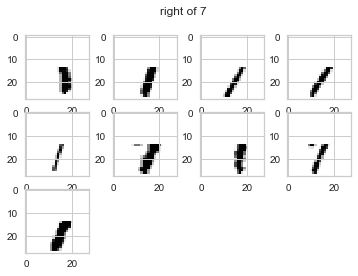

In [9]:
digit = 7
display_images(np.asarray(concepts[digit][location_key]),
               image_filename=None,
               title=f"{location_key} of {digit}")

In [ ]:
print()
first_name="sunil"



In [11]:
from math import sqrt
sqrt(16)

4.0

In [13]:
def add(numbers):
    result1 = 0
    for number in numbers:
        result1 = result1 + number
        
    return result1
    

In [ ]:
# A function is a reusable set of instruction (code) that is used to perform some task
# A function has  a set of input variables called parameters. The value of parameres should be send while calling the function

In [14]:
a =[2,3,4,5]
sum_a = add(a)
print(a)
print(sum_a)
print(result1)

[2, 3, 4, 5]
14
